# Lending Club Case Study

## Background

This Case study is an analysis consumer data finance/lending company to avoid risk on that company. here type of risks are associated with the bank's decision :

 - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

 - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

## Important Aspects of the Dataset

- Data set contains all loans processed by the Lending house
- Hereby two types of decisions that could be taken by the company:

 - the Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

  -  Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

  -  Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

  -  Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

- Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Approach
Analysis of the data will be divided into three parts as below :
- Preprocessing
- Data cleansing
- Univariate Data Analysis
- Bi-Variate Data Analysis

## Preprocessing

In [1]:
# loading libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [2]:
#load file
df = pd.read_csv("loan.csv",low_memory=False)

In [3]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Viewing list of data types  
df.dtypes.to_dict()

{'id': dtype('int64'),
 'member_id': dtype('int64'),
 'loan_amnt': dtype('int64'),
 'funded_amnt': dtype('int64'),
 'funded_amnt_inv': dtype('float64'),
 'term': dtype('O'),
 'int_rate': dtype('O'),
 'installment': dtype('float64'),
 'grade': dtype('O'),
 'sub_grade': dtype('O'),
 'emp_title': dtype('O'),
 'emp_length': dtype('O'),
 'home_ownership': dtype('O'),
 'annual_inc': dtype('float64'),
 'verification_status': dtype('O'),
 'issue_d': dtype('O'),
 'loan_status': dtype('O'),
 'pymnt_plan': dtype('O'),
 'url': dtype('O'),
 'desc': dtype('O'),
 'purpose': dtype('O'),
 'title': dtype('O'),
 'zip_code': dtype('O'),
 'addr_state': dtype('O'),
 'dti': dtype('float64'),
 'delinq_2yrs': dtype('int64'),
 'earliest_cr_line': dtype('O'),
 'inq_last_6mths': dtype('int64'),
 'mths_since_last_delinq': dtype('float64'),
 'mths_since_last_record': dtype('float64'),
 'open_acc': dtype('int64'),
 'pub_rec': dtype('int64'),
 'revol_bal': dtype('int64'),
 'revol_util': dtype('O'),
 'total_acc': dtyp

## Data Cleansing
 in this step we will clean data. we fix any data that is incorrect, inaccurate, incomplete, incorrectly formatted, duplicated, or even irrelevant to the objective of the data set

### Removing unwanted value

We need to remove unwanted value even not null value. since those value doesn't give view of trend

In [5]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [6]:
df1 = df[~(df.loan_status == 'Current')]
df1.shape

(38577, 111)

In [7]:
df1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Viewing list of data types
list(df1)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

### Filtering Data Set with essential parameters

for analysis needed, filtering data set is must. and we have to pick relavant variables

In [9]:
dfloan = df1[['loan_status','purpose','loan_amnt','term','funded_amnt','int_rate', 'funded_amnt_inv','installment','annual_inc','dti','total_pymnt','home_ownership']]
dfloan.head()

,loan_status,purpose,loan_amnt,term,funded_amnt,int_rate,funded_amnt_inv,installment,annual_inc,dti,total_pymnt,home_ownership
0,Fully Paid,credit_card,5000,36 months,5000,10.65%,4975.0,162.87,24000.0,27.65,5863.155187,RENT
1,Charged Off,car,2500,60 months,2500,15.27%,2500.0,59.83,30000.0,1.00,1008.710000,RENT
2,Fully Paid,small_business,2400,36 months,2400,15.96%,2400.0,84.33,12252.0,8.72,3005.666844,RENT
3,Fully Paid,other,10000,36 months,10000,13.49%,10000.0,339.31,49200.0,20.00,12231.890000,RENT
5,Fully Paid,wedding,5000,36 months,5000,7.90%,5000.0,156.46,36000.0,11.20,5632.210000,RENT


In [10]:
list(dfloan)

['loan_status',
 'purpose',
 'loan_amnt',
 'term',
 'funded_amnt',
 'int_rate',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'total_pymnt',
 'home_ownership']

### Fixing data type for variable int_rate

In [11]:
dfloan.int_rate = dfloan.int_rate.str.replace('%','').astype('float')

In [12]:
dfloan.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [13]:
dfloan

,loan_status,purpose,loan_amnt,term,funded_amnt,int_rate,funded_amnt_inv,installment,annual_inc,dti,total_pymnt,home_ownership
0,Fully Paid,credit_card,5000,36 months,5000,10.65,4975.0,162.87,24000.0,27.65,5863.155187,RENT
1,Charged Off,car,2500,60 months,2500,15.27,2500.0,59.83,30000.0,1.00,1008.710000,RENT
2,Fully Paid,small_business,2400,36 months,2400,15.96,2400.0,84.33,12252.0,8.72,3005.666844,RENT
3,Fully Paid,other,10000,36 months,10000,13.49,10000.0,339.31,49200.0,20.00,12231.890000,RENT
5,Fully Paid,wedding,5000,36 months,5000,7.90,5000.0,156.46,36000.0,11.20,5632.210000,RENT
...,...,...,...,...,...,...,...,...,...,...,...,...
39712,Fully Paid,home_improvement,2500,36 months,2500,8.07,1075.0,78.42,110000.0,11.33,2822.969293,MORTGAGE
39713,Fully Paid,credit_card,8500,36 months,8500,10.28,875.0,275.38,18000.0,6.40,9913.491822,RENT
39714,Fully Paid,debt_consolidation,5000,36 months,5000,8.07,1325.0,156.84,100000.0,2.30,5272.161128,MORTGAGE
39715,Fully Paid,other,5000,36 months,5000,7.43,650.0,155.38,200000.0,3.72,5174.198551,MORTGAGE


### Handling missing value

Check the distribution of missing value on the data

In [14]:
# Function for plotting displot
def plot_missing_value(dfloan):
    plt.figure(figsize=(30,30))
    sns.displot(
        data=dfloan.isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        # aspect=1.25,
        # vertical=True
        height=15
    )
    plt.show()

<Figure size 2160x2160 with 0 Axes>

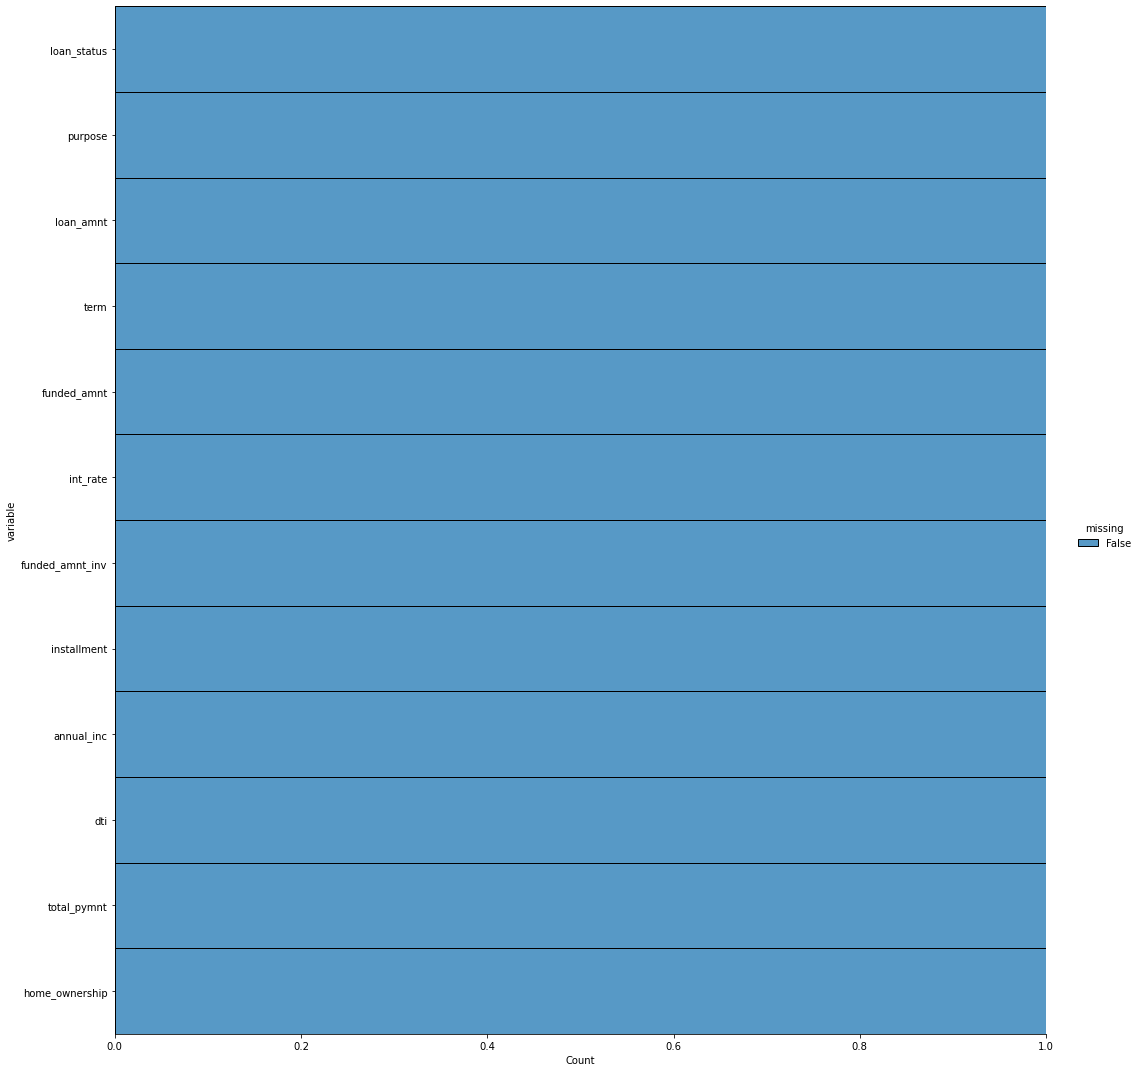

In [15]:
plot_missing_value(dfloan)

look great! lets check na value and drop it if find there

In [16]:
# Locate the columns which contains missing value
columns_na = dfloan.columns[dfloan.isna().any()].tolist()
columns_na

[]

from the result, we can see na value not appear on dataframe

###  Handling Constant Value Columns
theres no benefit of a variable/columns if theres only a single constant value in it, hence it will be removed

In [17]:
# Get the columns/variable which only consist of 1 distinct value
columns_constant = dfloan.columns[dfloan.nunique() == 1]
columns_constant

Index([], dtype='object')

from the result, no coloumn with constant value

### Handle Skewness in data
skewness in a columns/variable, isn't great to be feed to predictive modeling, it might cause bias in the future predictions, its best to handle it so that it has equal distribution

In [18]:
# Check skewness of more than 10
numeric_columns = dfloan.select_dtypes(exclude="object").columns
skew_columns = dfloan[numeric_columns].loc[:,(dfloan[numeric_columns].skew() > 10).to_list()].columns
dfloan[skew_columns].skew()

annual_inc    31.198414
dtype: float64

In [19]:
# Bining interest rate categories
dfloan['int_rate_cate'] = pd.cut(dfloan['int_rate'], [0, 10, 12.5, 15, 20], labels=['0-10', '10-12.5', '12.5-15', '15+'])
dfloan['int_rate_cate'].value_counts()

0-10       12316
10-12.5     9380
12.5-15     8885
15+         7226
Name: int_rate_cate, dtype: int64

In [20]:
# Binning dti to Categories
dfloan['dti_ratio'] = pd.cut(dfloan['dti'], [0, 5, 10, 15, 20, 25, 30, 35], labels=['0-5', '5-10', '10-15', '15-20','20-25','25-30','30+'])
dfloan.dti_ratio.value_counts()

10-15    9630
15-20    8811
5-10     7873
20-25    6578
0-5      4884
25-30     623
30+         0
Name: dti_ratio, dtype: int64

In [21]:
# Binning Annual Income to Categories
dfloan['annual_inc'] = pd.cut(dfloan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000+'])
dfloan.annual_inc.value_counts()

40000-60000    11263
80000+          9981
20000-40000     8518
60000-80000     7621
0-20000         1180
Name: annual_inc, dtype: int64

In [22]:
#checking coloumn in dataframe we use
list(dfloan)

['loan_status',
 'purpose',
 'loan_amnt',
 'term',
 'funded_amnt',
 'int_rate',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'total_pymnt',
 'home_ownership',
 'int_rate_cate',
 'dti_ratio']

we can see coloumn updated, new coloumns already added


## Univariate Data Analysis

Univariate is a term commonly used in statistics to describe a type of data which consists of observations on only a single characteristic or attribute. A simple example of univariate data would be the salaries of workers in industry.

Univariate analysis is the simplest form of analyzing data. Uni means one, so in other words the data has only one variable. Univariate data requires to analyze each variable separately. Data is gathered for the purpose of answering a question, or more specifically, a research question. - Ref : https://en.wikipedia.org/wiki/Univariate_(statistics)

### Good Vs Bad Borrowers

in this step, we can see comparasion between Good and Bad borrower

<AxesSubplot:xlabel='loan_status', ylabel='count'>

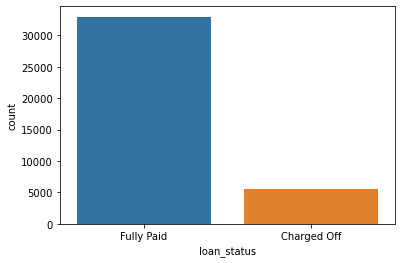

In [23]:
sns.countplot(df1['loan_status']) 

##### Observation


Total number of fully paid is significant higher than charged off. mean good borrower higher than bad borrower

### Long Term Vs Short Term

in this step, we can see number of payments on the loan. they are have 2 category, 36 months and 60 months

<AxesSubplot:xlabel='term', ylabel='count'>

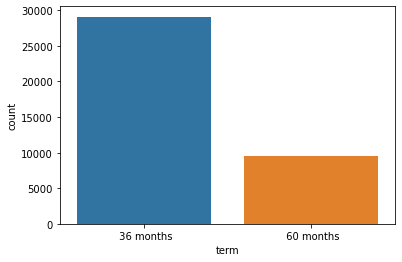

In [24]:
sns.countplot(df1['term']) 

##### Observation
Total number of fully paid is significant higher than charged off. Less than 15% of all applicants were charged off. Can be assume that there is a 15% risk that a applicant will charged off. More people apply 36 months term than 60 months

### Analyzing Distribution according to the purpose of payments

In [25]:
dfpurpose =  pd.DataFrame((dfloan.purpose.value_counts()*100)/len(dfloan))

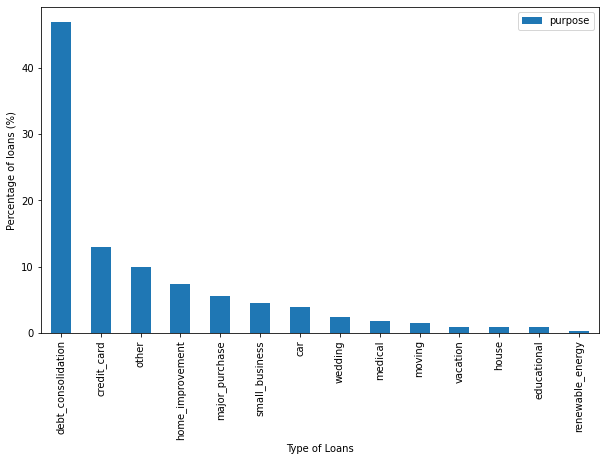

In [26]:
ax = dfpurpose.plot(kind='bar' , stacked="True", figsize=[10,6])
ax.set_xlabel("Type of Loans")
ax.set_ylabel("Percentage of loans (%)")
plt.show()

#### Observation

Debt consolidation and credit card make up more than 50% of all the purposes people took a loan

## Bivariate Data Analysis

Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association - Ref : https://en.wikipedia.org/wiki/Bivariate_analysis

### Loan Status Vs Funded Amount

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt'>

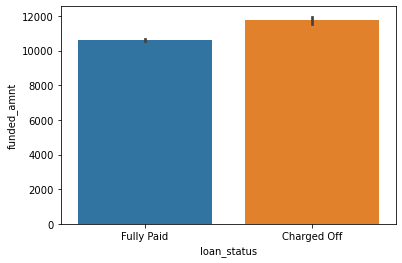

In [27]:
sns.barplot(x='loan_status',y='funded_amnt',data=dfloan)

#### Observation

On funded_amount vs loan_status, for amount less than 11000 applicants are fully paid and for 11000 above applicants are charged off. Risk is high when funded amount is more than 11000

#### Home Ownership Vs Loan Status

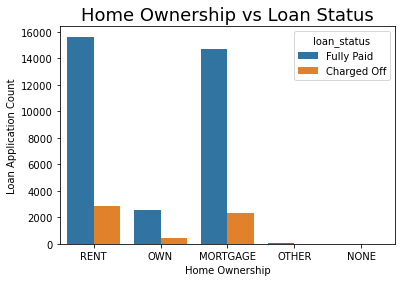

In [28]:
ax = sns.countplot(x="home_ownership",data=dfloan,hue='loan_status')
ax.set_title('Home Ownership vs Loan Status', size=18)
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Loan Application Count')   
plt.show()

#### Observation

More number of applicants has home ownership status on rent than mortgage and own. But there is no significant on rent have more number of charge off than mortgage or vice versa

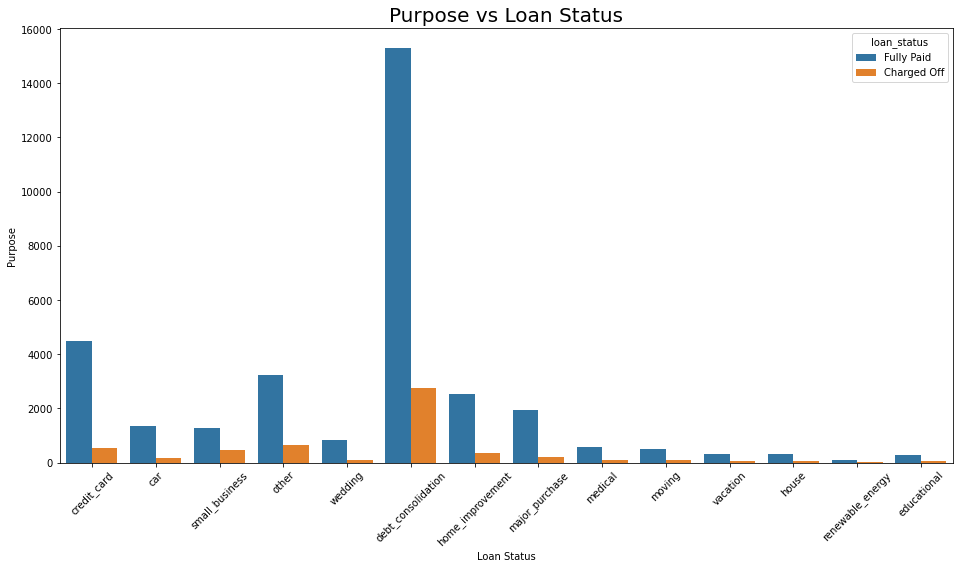

In [29]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
ax = sns.countplot(x="purpose",data=dfloan,hue='loan_status')
ax.set_title('Purpose vs Loan Status', size=20)
ax.set_xlabel('Loan Status')
ax.set_ylabel('Purpose')   
plt.show()

#### Observe
Most people loan for debt consolidation and least people loan for renewable energy

#### Interest Rate Vs Loan Status

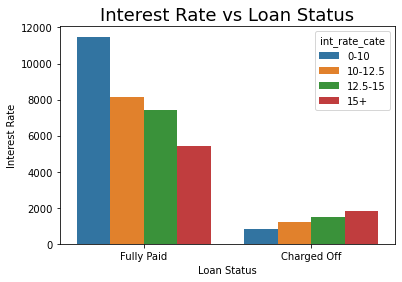

In [30]:
ax = sns.countplot(x="loan_status",data=dfloan,hue='int_rate_cate')
ax.set_title('Interest Rate vs Loan Status', size=18)
ax.set_xlabel('Loan Status')
ax.set_ylabel('Interest Rate')   
plt.show()

##### Observation
Graph of interest rate vs loan status shows a bell curve. We can say that most ppl took loan with interest between 10-15%. On the charge off bell, the number on the right side is much higher than left side. It indicate that higher interest rate will have more risk on charge off

#### Term Vs Loan Status

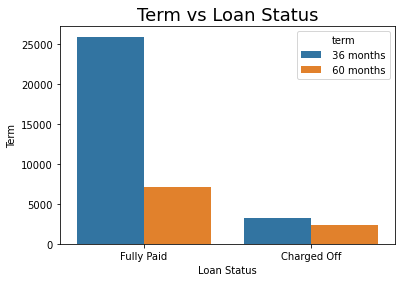

In [31]:
ax = sns.countplot(x="loan_status",data=dfloan,hue='term')
ax.set_title('Term vs Loan Status', size=18)
ax.set_xlabel('Loan Status')
ax.set_ylabel('Term')   
plt.show()

##### Observation
Comparing the term with loan status, we found that 60 months term have higher percentage of charge of than 36 months. Therefore, longer term would impose a higher risk for charge off.

#### Ration Vs Loan Status

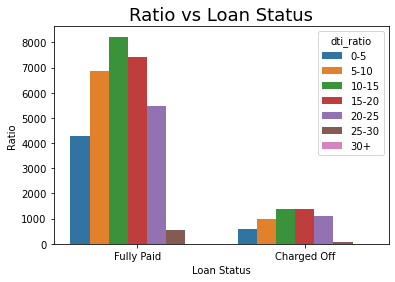

In [32]:
ax = sns.countplot(x="loan_status",data=dfloan,hue='dti_ratio')
ax.set_title('Ratio vs Loan Status', size=18)
ax.set_xlabel('Loan Status')
ax.set_ylabel('Ratio')   
plt.show()

##### Observation
Ratio vs loan status graph show a bell curve graph. For fully paid, the bell peak at 10-15. Whereas for charged off the bell peak between 10-15 and 15-20. We can see that the peak shifted towards higher ratio for charged off. This shows that higher dti ratio applicants will have higher risk of charged off

### Heatmap

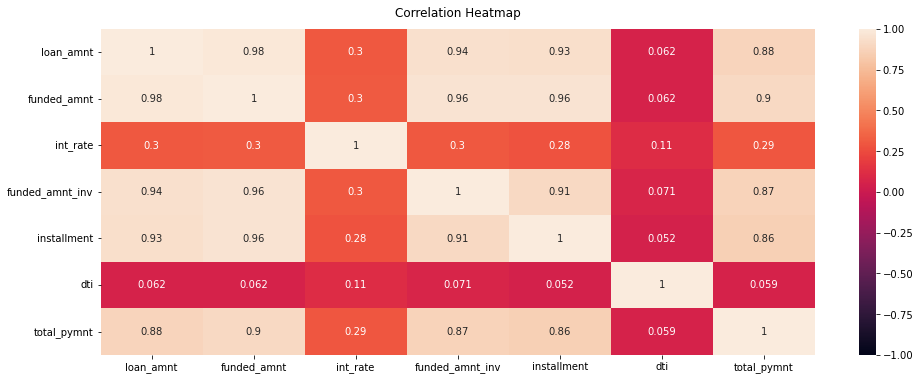

In [33]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dfloan.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### Observe
based on heatmap above we can see highest score is funded_amnt and loan_amnt with score 0.98 and following with score 0.96 are funded_amnt_inv with funded_amnt and installment with funded_amnt